# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

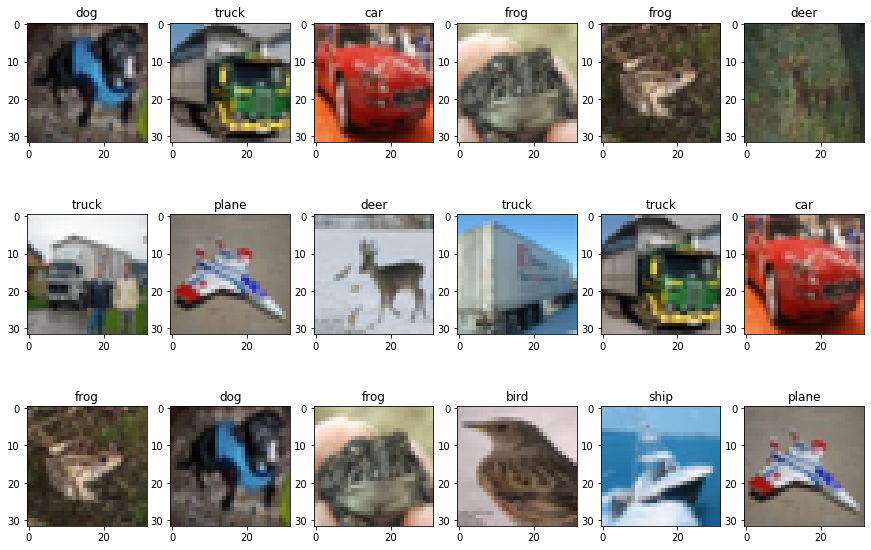

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Classes'), Text(0, 0.5, 'Counts'))

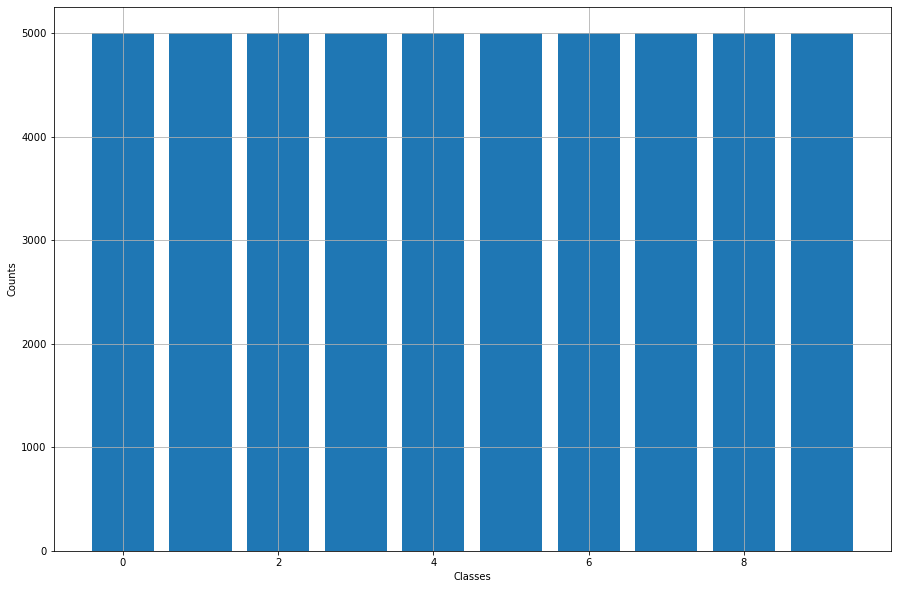

In [4]:
# Compute the class histogram
from collections import Counter
hist = Counter([item[0] for item in y_train.tolist()])

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Classes'), plt.ylabel('Counts')

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [5]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [6]:
# Build the classifier
inputs = Input(shape=x_train.shape[1:])

net = Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(16, kernel_size=(2, 2), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(16, kernel_size=(2, 2), activation="relu")(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 16)          1040  

### Step 3: Training

Compile the model and train it.

In [7]:
epochs = 50
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', f"~ {round((time() - start)/60)} min")

Epoch 1/50
352/352 [==============================] - 12s 33ms/step - loss: 1.8197 - accuracy: 0.3411 - val_loss: 1.6690 - val_accuracy: 0.4080
Epoch 2/50
352/352 [==============================] - 11s 32ms/step - loss: 1.5024 - accuracy: 0.4634 - val_loss: 1.4501 - val_accuracy: 0.4810
Epoch 3/50
352/352 [==============================] - 12s 33ms/step - loss: 1.4001 - accuracy: 0.5043 - val_loss: 1.3668 - val_accuracy: 0.5090
Epoch 4/50
352/352 [==============================] - 11s 33ms/step - loss: 1.3378 - accuracy: 0.5266 - val_loss: 1.2936 - val_accuracy: 0.5348
Epoch 5/50
352/352 [==============================] - 11s 32ms/step - loss: 1.2936 - accuracy: 0.5440 - val_loss: 1.2704 - val_accuracy: 0.5538
Epoch 6/50
352/352 [==============================] - 11s 32ms/step - loss: 1.2597 - accuracy: 0.5566 - val_loss: 1.2392 - val_accuracy: 0.5622
Epoch 7/50
352/352 [==============================] - 12s 33ms/step - loss: 1.2262 - accuracy: 0.5707 - val_loss: 1.2410 - val_accuracy:

Train Acc      0.7095555663108826
Validation Acc 0.6917999982833862


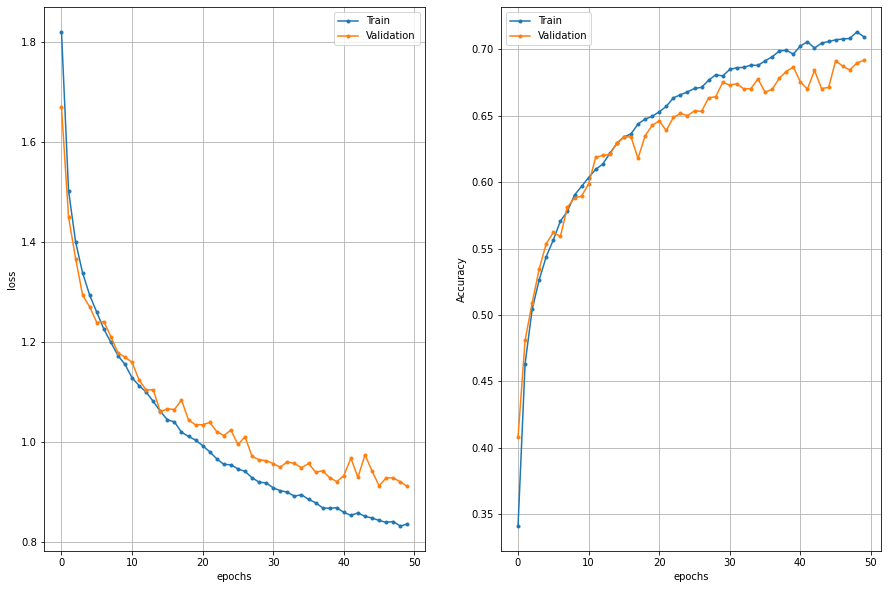

In [8]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [9]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:20])
print('Pred', np.argmax(y_pred[0:20, :], axis=1))

313/313 [==============================] - 1s 4ms/step
True [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
Pred [3 8 0 0 6 6 1 6 3 1 0 9 5 7 9 6 5 7 8 6]


In [10]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    class_count = 0
    pred_count = 0
    for idx, a in enumerate(y_true):
        if a == class_id:
            class_count += 1
            pred_count += 1 if np.argmax(y_pred[idx]) == a else 0
            
    acc = (pred_count / class_count) * 100
    print(class_name, f"{round(acc)} %")

plane 72 %
car 81 %
bird 53 %
cat 52 %
deer 62 %
dog 57 %
frog 80 %
horse 68 %
ship 76 %
truck 78 %


In [11]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.9330 - accuracy: 0.6787
Test loss   0.933016300201416
Test metric 0.6786999702453613


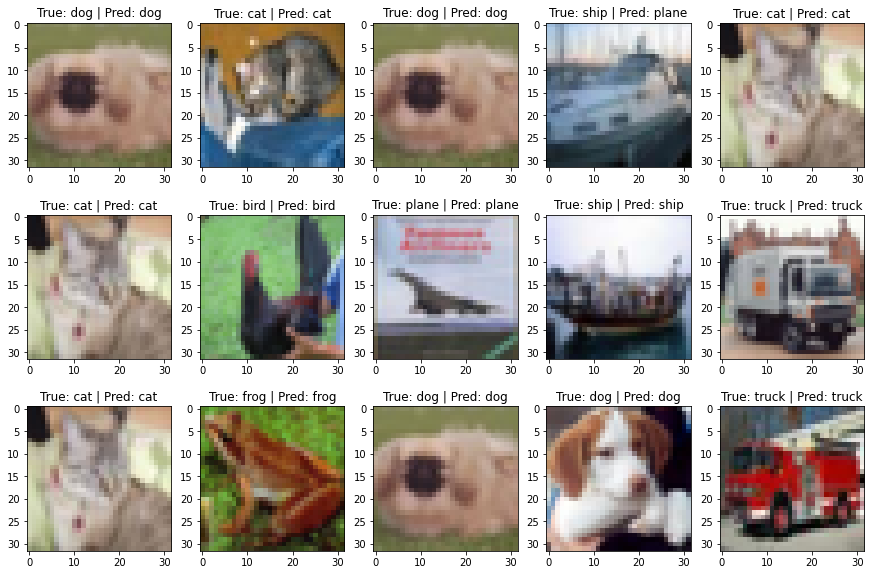

In [12]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[np.argmax(y_pred[idx])]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

## Answers
- ~70%

- If I could I would add more higher quality images with better resolution.

- I added more epochs but this not helped me